In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
file_path = "/content/drive/My Drive/preprocessed_jongto_july.csv"

# pandas로 CSV 파일 읽기
df = pd.read_csv(file_path)
df.head()

,게시일,제목,링크,조회수,공감
0,2023-07-31,간첩 윤석열,https://jongto.net/jongto/256114766?page=30635,197,19
1,2023-07-31,큰조정에도 내가 흔들리지 않는 이유,https://jongto.net/jongto/256114749?page=30635,311,1
2,2023-07-31,스마트 개미들 수고하셨습니다,https://jongto.net/jongto/256114700?page=30635,274,41
3,2023-07-31,걱정 말어 낼도 외국인이 잣나게 올려,https://jongto.net/jongto/256114671?page=30635,157,18
4,2023-07-31,지금 증권사 신문사와 개인투자자들과,https://jongto.net/jongto/256114640?page=30635,267,24


In [ ]:
!pip install torch
!pip install transformers
!pip install emoji
!pip install soynlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 96.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 kB 6.7 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("beomi/KcELECTRA-base")
model = AutoModelForSequenceClassification.from_pretrained("beomi/KcELECTRA-base")

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch
df = df.dropna(subset=['제목'])

titles = df['제목'].astype(str).tolist()

# 감정분석 수행
predictions = []
probabilities = []  # 확률을 저장할 리스트

for title in titles:
    inputs = tokenizer(title, return_tensors="pt", truncation=True, padding=True, max_length=512)

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

        # softmax 확률 계산
        probs = torch.softmax(logits, dim=-1)[0]  # 첫 번째 차원에서 softmax 적용

        pred = torch.argmax(logits, dim=1).item()
        predictions.append(pred)

        # 최대 확률값만 저장 (예측된 클래스의 확률)
        probabilities.append(probs[pred].item())

df['감정분석결과'] = predictions
df['감정분석확률'] = probabilities  # 데이터프레임에 확률 열 추가

# 결과 확인
df.head()


,게시일,제목,링크,조회수,공감,감정분석결과,감정분석확률
0,2023-07-31,간첩 윤석열,https://jongto.net/jongto/256114766?page=30635,197,19,0,0.520922
1,2023-07-31,큰조정에도 내가 흔들리지 않는 이유,https://jongto.net/jongto/256114749?page=30635,311,1,1,0.503280
2,2023-07-31,스마트 개미들 수고하셨습니다,https://jongto.net/jongto/256114700?page=30635,274,41,0,0.505419
3,2023-07-31,걱정 말어 낼도 외국인이 잣나게 올려,https://jongto.net/jongto/256114671?page=30635,157,18,1,0.500914
4,2023-07-31,지금 증권사 신문사와 개인투자자들과,https://jongto.net/jongto/256114640?page=30635,267,24,0,0.514121


In [ ]:
df.tail()

,게시일,제목,링크,조회수,공감,감정분석결과,감정분석확률
15957,2023-07-01,차트가 참 아름답습니다,https://jongto.net/jongto/252984427?page=47600,385,19,1,0.507027
15958,2023-07-01,한병화는 무섭겠다,https://jongto.net/jongto/252984385?page=47600,776,86,1,0.504070
15959,2023-07-01,주식은,https://jongto.net/jongto/252984297?page=47600,543,21,1,0.510022
15960,2023-07-01,월올날부터 공매는 바 사 난다,https://jongto.net/jongto/252984172?page=47615,583,55,1,0.501094
15961,2023-07-01,우리 에코가 잘되길 기원합니다,https://jongto.net/jongto/252983923?page=47615,684,49,1,0.500283


In [ ]:
value_counts = df['감정분석결과'].value_counts()
print(value_counts)

0    8458
1    7426
Name: 감정분석결과, dtype: int64


In [ ]:
# DataFrame을 UTF-8 인코딩으로 CSV 파일로 저장합니다.
df.to_csv('example_utf8.csv', index=False, encoding='utf-8')

In [ ]:
new_df = df.groupby('게시일')['감정분석결과'].mean().reset_index()
new_df

,게시일,감정분석결과
0,2023-07-01,0.503906
1,2023-07-02,0.410256
2,2023-07-03,0.433028
3,2023-07-04,0.477477
4,2023-07-05,0.484144
5,2023-07-06,0.476987
6,2023-07-07,0.423301
7,2023-07-08,0.419643
8,2023-07-09,0.474227
9,2023-07-10,0.463621


In [ ]:
df['감정분석확률'] = df.apply(lambda x: 1 - x['감정분석확률'] if x['감정분석결과'] == 0 else x['감정분석확률'], axis=1)

# 결과 확인
df.head()

,게시일,제목,링크,조회수,공감,감정분석결과,감정분석확률
0,2023-07-31,간첩 윤석열,https://jongto.net/jongto/256114766?page=30635,197,19,0,0.479078
1,2023-07-31,큰조정에도 내가 흔들리지 않는 이유,https://jongto.net/jongto/256114749?page=30635,311,1,1,0.503280
2,2023-07-31,스마트 개미들 수고하셨습니다,https://jongto.net/jongto/256114700?page=30635,274,41,0,0.494581
3,2023-07-31,걱정 말어 낼도 외국인이 잣나게 올려,https://jongto.net/jongto/256114671?page=30635,157,18,1,0.500914
4,2023-07-31,지금 증권사 신문사와 개인투자자들과,https://jongto.net/jongto/256114640?page=30635,267,24,0,0.485879


In [ ]:
df

,게시일,제목,링크,조회수,공감,감정분석결과,감정분석확률
0,2023-07-31,간첩 윤석열,https://jongto.net/jongto/256114766?page=30635,197,19,0,0.479078
1,2023-07-31,큰조정에도 내가 흔들리지 않는 이유,https://jongto.net/jongto/256114749?page=30635,311,1,1,0.503280
2,2023-07-31,스마트 개미들 수고하셨습니다,https://jongto.net/jongto/256114700?page=30635,274,41,0,0.494581
3,2023-07-31,걱정 말어 낼도 외국인이 잣나게 올려,https://jongto.net/jongto/256114671?page=30635,157,18,1,0.500914
4,2023-07-31,지금 증권사 신문사와 개인투자자들과,https://jongto.net/jongto/256114640?page=30635,267,24,0,0.485879
...,...,...,...,...,...,...,...
15957,2023-07-01,차트가 참 아름답습니다,https://jongto.net/jongto/252984427?page=47600,385,19,1,0.507027
15958,2023-07-01,한병화는 무섭겠다,https://jongto.net/jongto/252984385?page=47600,776,86,1,0.504070
15959,2023-07-01,주식은,https://jongto.net/jongto/252984297?page=47600,543,21,1,0.510022
15960,2023-07-01,월올날부터 공매는 바 사 난다,https://jongto.net/jongto/252984172?page=47615,583,55,1,0.501094


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 인스턴스 생성
scaler = MinMaxScaler()

# '감정분석확률' 컬럼을 scaling. fit_transform은 2차원 배열을 기대하기 때문에 reshape(-1, 1)을 사용
df['보정된_감정분석확률'] = scaler.fit_transform(df['감정분석확률'].values.reshape(-1, 1))

# 결과 확인
df.head()

,게시일,제목,링크,조회수,공감,감정분석결과,감정분석확률,보정된_감정분석확률
0,2023-07-31,간첩 윤석열,https://jongto.net/jongto/256114766?page=30635,197,19,0,0.479078,0.268361
1,2023-07-31,큰조정에도 내가 흔들리지 않는 이유,https://jongto.net/jongto/256114749?page=30635,311,1,1,0.503280,0.613044
2,2023-07-31,스마트 개미들 수고하셨습니다,https://jongto.net/jongto/256114700?page=30635,274,41,0,0.494581,0.489166
3,2023-07-31,걱정 말어 낼도 외국인이 잣나게 올려,https://jongto.net/jongto/256114671?page=30635,157,18,1,0.500914,0.579351
4,2023-07-31,지금 증권사 신문사와 개인투자자들과,https://jongto.net/jongto/256114640?page=30635,267,24,0,0.485879,0.365229


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

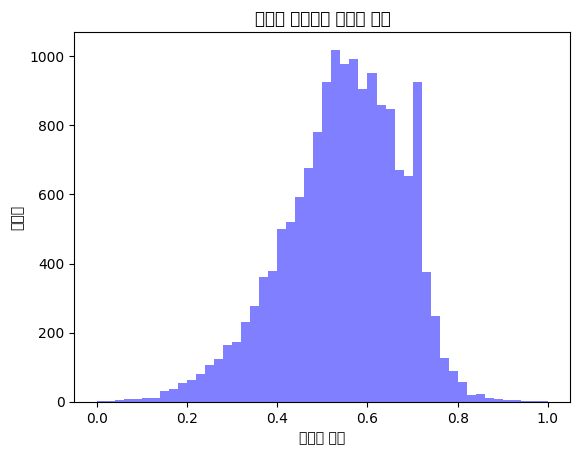

In [ ]:
import matplotlib.pyplot as plt

# 히스토그램 생성
plt.hist(df['보정된_감정분석확률'], bins=50, alpha=0.5, color='blue')

# 그래프 제목과 축 레이블 설정
plt.title('보정된 감정분석 확률의 분포')
plt.xlabel('보정된 확률')
plt.ylabel('빈도수')

# 그래프 보여주기
plt.show()

min-max 스케일링으로 한번 표준화
0.15
0.2
0.3
0.2
0.15
이 비율로 나눔

In [ ]:
def assign_label(value):
    if value <= 0.15:
        return '강한 부정'
    elif value <= 0.35:
        return '약한 부정'
    elif value <= 0.65:
        return '중립'
    elif value <= 0.85:
        return '약한 긍정'
    else:
        return '강한 긍정'

df['감정레이블'] = df['보정된_감정분석확률'].apply(assign_label)


df.head()

,게시일,제목,링크,조회수,공감,감정분석결과,감정분석확률,보정된_감정분석확률,감정레이블
0,2023-07-31,간첩 윤석열,https://jongto.net/jongto/256114766?page=30635,197,19,0,0.479078,0.268361,약한 부정
1,2023-07-31,큰조정에도 내가 흔들리지 않는 이유,https://jongto.net/jongto/256114749?page=30635,311,1,1,0.503280,0.613044,중립
2,2023-07-31,스마트 개미들 수고하셨습니다,https://jongto.net/jongto/256114700?page=30635,274,41,0,0.494581,0.489166,중립
3,2023-07-31,걱정 말어 낼도 외국인이 잣나게 올려,https://jongto.net/jongto/256114671?page=30635,157,18,1,0.500914,0.579351,중립
4,2023-07-31,지금 증권사 신문사와 개인투자자들과,https://jongto.net/jongto/256114640?page=30635,267,24,0,0.485879,0.365229,중립


In [ ]:
emotion_label_counts = df['감정레이블'].value_counts()

print(emotion_label_counts)

중립       11041
약한 긍정     3577
약한 부정     1160
강한 부정       67
강한 긍정       39
Name: 감정레이블, dtype: int64


### **아래**

In [41]:
def assign_label(value):
    if value <= 0.15:
        return '강한 부정'
    elif value <= 0.35:
        return '약한 부정'
    elif value <= 0.65:
        return '중립'
    elif value <= 0.85:
        return '약한 긍정'
    else:
        return '강한 긍정'


In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import pandas as pd
file_path = "/content/drive/MyDrive/23-2 창의적종합설계 /data/감정분석 데이터/jongto_eco_senti.csv"

# pandas로 CSV 파일 읽기
eco_jongto_df = pd.read_csv(file_path)
eco_jongto_df.head()

,게시일,제목,조회수,공감,감정분석결과,감정분석확률,보정된_감정분석확률
0,2023-07-31,털리지 맙시다,30,2,0,0.465165,0.337169
1,2023-07-31,에코프로비엠,46,3,0,0.473691,0.477446
2,2023-07-31,지난주 목요일 같은 폭락은 없다,124,11,0,0.467776,0.380129
3,2023-07-31,주주님들 잘 지킵시다,52,7,0,0.457438,0.210048
4,2023-07-31,갭상승해서 일선 위다,53,1,0,0.467297,0.372254


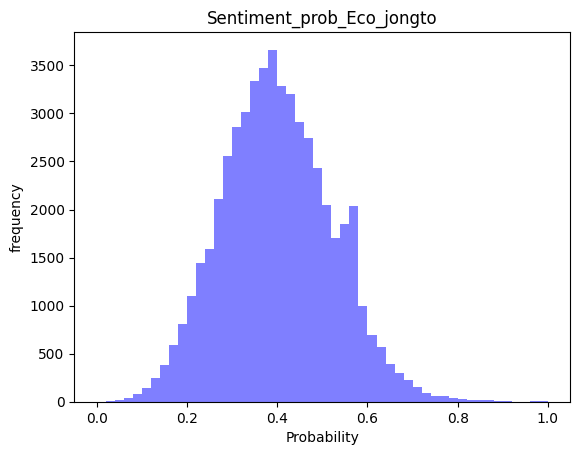

In [44]:
import matplotlib.pyplot as plt
# 히스토그램 생성
plt.hist(eco_jongto_df['보정된_감정분석확률'], bins=50, alpha=0.5, color='blue')

# 그래프 제목과 축 레이블 설정
plt.title('Sentiment_prob_Eco_jongto')
plt.xlabel('Probability')
plt.ylabel('frequency')

# 그래프 보여주기
plt.show()

In [45]:
eco_jongto_df['감정레이블'] = eco_jongto_df['보정된_감정분석확률'].apply(assign_label)
emotion_label_counts = eco_jongto_df['감정레이블'].value_counts()
print(emotion_label_counts)

중립       33556
약한 부정    17889
약한 긍정     1161
강한 부정      707
강한 긍정       39
Name: 감정레이블, dtype: int64


In [46]:
# 감정 레이블의 빈도를 비율로 변환
emotion_label_counts = eco_jongto_df['감정레이블'].value_counts(normalize=True)

# 결과 출력
print(emotion_label_counts)

중립       0.628955
약한 부정    0.335301
약한 긍정    0.021761
강한 부정    0.013252
강한 긍정    0.000731
Name: 감정레이블, dtype: float64


In [47]:
import pandas as pd
file_path = "/content/drive/MyDrive/23-2 창의적종합설계 /data/감정분석 데이터/jongto_sm_senti.csv"

# pandas로 CSV 파일 읽기
sm_jongto_df = pd.read_csv(file_path)
sm_jongto_df.head()

,게시일,제목,조회수,공감,감정분석결과,감정분석확률,보정된_감정분석확률
0,2023-08-02,축하 해 줘라,528,2,0,0.464881,0.295672
1,2023-08-02,잘 올라갈 때 게시판 등장하는 유형들,605,11,0,0.469759,0.363518
2,2023-08-02,내일 엔시티 드림 마크 생일,346,6,0,0.477876,0.476401
3,2023-08-02,에스엠 감 다뒤졌냐,1070,5,0,0.467127,0.326910
4,2023-08-02,중국이 현재 겪고 있는 어려움이 과거 일본의 상황과 놀라울 정도로 유사하다고 지적한다,287,1,0,0.483854,0.559543


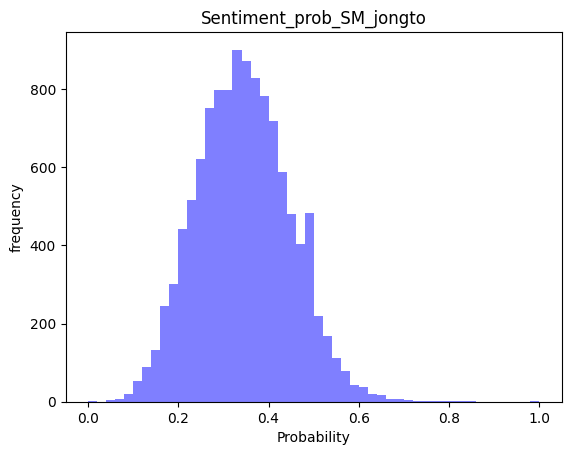

In [48]:
import matplotlib.pyplot as plt
# 히스토그램 생성
plt.hist(sm_jongto_df['보정된_감정분석확률'], bins=50, alpha=0.5, color='blue')

# 그래프 제목과 축 레이블 설정
plt.title('Sentiment_prob_SM_jongto')
plt.xlabel('Probability')
plt.ylabel('frequency')

# 그래프 보여주기
plt.show()

In [49]:
sm_jongto_df['감정레이블'] = sm_jongto_df['보정된_감정분석확률'].apply(assign_label)
emotion_label_counts = sm_jongto_df['감정레이블'].value_counts()
print(emotion_label_counts)

약한 부정    5918
중립       5367
강한 부정     229
약한 긍정      36
강한 긍정       1
Name: 감정레이블, dtype: int64


In [50]:
# 감정 레이블의 빈도를 비율로 변환
emotion_label_counts = sm_jongto_df['감정레이블'].value_counts(normalize=True)

# 결과 출력
print(emotion_label_counts)

약한 부정    0.512337
중립       0.464635
강한 부정    0.019825
약한 긍정    0.003117
강한 긍정    0.000087
Name: 감정레이블, dtype: float64


In [51]:
import pandas as pd
file_path = "/content/drive/MyDrive/23-2 창의적종합설계 /data/감정분석 데이터/news_eco_senti.csv"

# pandas로 CSV 파일 읽기
eco_news_df = pd.read_csv(file_path)
eco_news_df.head()

,제목,작성일시,본문,요약,감정분석결과,감정분석확률,보정된_감정분석확률
0,반도체만 바라보는 천수답 수출 하반기엔 보릿고개 넘을까,2023-02-01,반도체수출액 억에서 억 램값도 역대최저 호재 실종 수출액 퍼센트 쪼그라들어이창양 수...,반도체수출액 억에서 억 램값도 역대최저 호재 실종 수출액 퍼센트 쪼그라들어이창양 수...,0,0.495680,0.828955
1,내일 새벽 나올 회의 결과 파월은 어떤 입장 내 놓을까,2023-02-01,제롬 파월 미국 연방준비제도 이사회 의장 뉴시스코스피가 이틀 간의 약세를 멈추고 다...,금융 환경의 완화가 더 가속화되지 않도록 제롬 파월 연준 이사회 의장이 매파적 입장...,0,0.496964,0.873622
2,코스피 외인 매수에 반등 선 턱밑,2023-02-01,코스닥도 퍼센트상승코스피지수가 외국인 매수세에 상승 마감했다 코스피가 상승 마감했다...,코스닥도 퍼센트상승코스피지수가 외국인 매수세에 상승 마감했다 일 코스피는 전일 대비...,0,0.490501,0.648791
3,코스피 앞두고 퍼센트 상승 마감 외국인 순매수 전환,2023-02-01,전날 하락한 삼성전자 하이닉스 반등 코스피 대로 올라서 상승 출발 일 서울 명동 하...,지수는 전장보다 포인트 오른 로 출발했다 지수는 전장보다 포인트 높은 으로 출발해 ...,0,0.491181,0.672453
4,삼성 조 조 날아간 반도체 혜택,2023-02-01,법인세 최저한세 에 발목잡힌 투자 세액공제최대 퍼센트 공제율 적용때 실효세율삼성 퍼...,법인세 최저한세 에 발목잡힌 투자 세액공제최대 퍼센트 공제율 적용때 실효세율삼성 퍼...,0,0.491181,0.672463


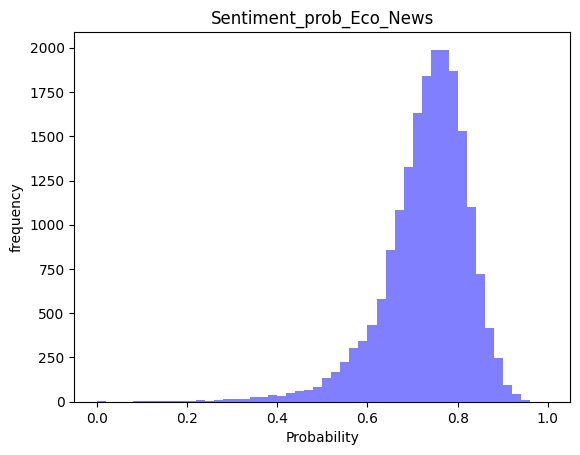

In [52]:
import matplotlib.pyplot as plt
# 히스토그램 생성
plt.hist(eco_news_df['보정된_감정분석확률'], bins=50, alpha=0.5, color='blue')

# 그래프 제목과 축 레이블 설정
plt.title('Sentiment_prob_Eco_News')
plt.xlabel('Probability')
plt.ylabel('frequency')

# 그래프 보여주기
plt.show()

In [53]:
eco_news_df['감정레이블'] = eco_news_df['보정된_감정분석확률'].apply(assign_label)
emotion_label_counts = eco_news_df['감정레이블'].value_counts()
print(emotion_label_counts)

약한 긍정    15229
중립        2942
강한 긍정     1124
약한 부정       97
강한 부정       16
Name: 감정레이블, dtype: int64


In [54]:
# 감정 레이블의 빈도를 비율로 변환
emotion_label_counts = eco_news_df['감정레이블'].value_counts(normalize=True)

# 결과 출력
print(emotion_label_counts)

약한 긍정    0.784676
중립       0.151587
강한 긍정    0.057914
약한 부정    0.004998
강한 부정    0.000824
Name: 감정레이블, dtype: float64


In [55]:
import pandas as pd
file_path = "/content/drive/MyDrive/23-2 창의적종합설계 /data/감정분석 데이터/pax_eco_senti.csv"

# pandas로 CSV 파일 읽기
eco_pax_df = pd.read_csv(file_path)
eco_pax_df.head()

,제목,조회수,추천수,게시일,본문,감정분석결과,감정분석확률,보정된_감정분석확률
0,이차전지 곡소리 전주곡,283,0,2023-07-31,유튜버 사이비들이 조잘거려도 현실과 꿈의 괴리는 좁혀질수밖에 없다테슬라실적이 적자전...,1,0.502615,0.094420
1,에코프로의 운명은,280,0,2023-07-31,한때 저들도 하늘로 치솟다 못해 달나라로 가는줄 알았다,1,0.511356,0.257438
2,종가는 예상,390,0,2023-07-31,종가 로 보는 이유바베큐차는 하이브리드만큼 팔수가없다아이들만 관심 어른들은 패스충전...,1,0.506129,0.159961
3,이차전지와 강남공구리 거품경합,4879,0,2023-07-30,세방리튬배터리 미국 수출 한국산업기술시험원 은 수출 활성화를 위한 신속 지원 조치로...,1,0.511629,0.262523
4,공매도 제도 개선에 관한 국민동의청원,599,1,2023-07-30,주식을 빌리지 않고 미리 공매도를 하는 무차입 공매도 는 금지되어 있는데 공매도 세...,1,0.509303,0.219141


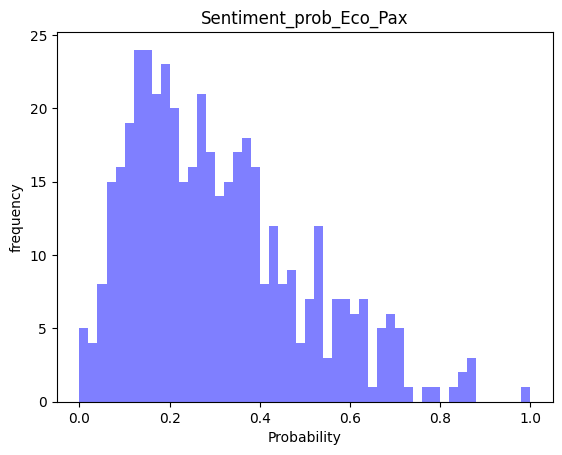

In [63]:
import matplotlib.pyplot as plt
# 히스토그램 생성
plt.hist(eco_pax_df['보정된_감정분석확률'], bins=50, alpha=0.5, color='blue')

# 그래프 제목과 축 레이블 설정
plt.title('Sentiment_prob_Eco_Pax')
plt.xlabel('Probability')
plt.ylabel('frequency')

# 그래프 보여주기
plt.show()

In [57]:
eco_pax_df['감정레이블'] = eco_pax_df['보정된_감정분석확률'].apply(assign_label)
emotion_label_counts = eco_pax_df['감정레이블'].value_counts()
print(emotion_label_counts)

약한 부정    182
중립       132
강한 부정    104
약한 긍정     23
강한 긍정      4
Name: 감정레이블, dtype: int64


In [58]:
# 감정 레이블의 빈도를 비율로 변환
emotion_label_counts = eco_pax_df['감정레이블'].value_counts(normalize=True)

# 결과 출력
print(emotion_label_counts)

약한 부정    0.408989
중립       0.296629
강한 부정    0.233708
약한 긍정    0.051685
강한 긍정    0.008989
Name: 감정레이블, dtype: float64


In [59]:
import pandas as pd
file_path = "/content/drive/MyDrive/23-2 창의적종합설계 /data/감정분석 데이터/news_sm_senti.csv"

# pandas로 CSV 파일 읽기
sm_news_df = pd.read_csv(file_path)
sm_news_df.head()

,제목,작성일시,본문,요약,감정분석결과,감정분석확률,보정된_감정분석확률
0,팝 가수 깨알 정보까지 한눈에 제공,2023-02-01,김홍기 스페이스오디티 대표팬덤 플랫폼 블립 운영 팝 스타에 대해 미주알고주알 깨알 ...,김홍기 스페이스오디티 대표팬덤 플랫폼 블립 운영 팝 스타에 대해 미주알고주알 깨알 ...,0,0.496850,0.890088
1,올해 신인그룹 속속 데뷔 기대 커진 엔터주 동반강세,2023-02-01,하이브 걸그룹 뉴진스 돌풍방탄소년단 공백 거뜬히 메워 엔터 모두 팀 출격 예정 분기...,하이브 걸그룹 뉴진스 돌풍방탄소년단 공백 거뜬히 메워 엔터 모두 팀 출격 예정 분기...,0,0.493287,0.740959
2,뉴진스는 좋지만 배당은 아쉽다 시총 조 하이브 주주환원 방안에는 침묵,2023-02-02,엔터테인먼트 지난해 첫 배당 실시 그룹 방탄소년단 공백에도 하이브의 주가 상승세가 ...,주가는 작년 월 저점 대비 퍼센트 올랐다 증권가에서도 신인 그룹 제작원가 반영 부진...,0,0.492567,0.710829
3,엔터가 내놓고 엔터가 흔드는 묘한,2023-02-02,매물로 나온지 한참 흐른 엔터군불만 뗄 뿐 거래 이어지지 않아 카카오엔터 등 군침 ...,이수만 엔터테인먼트 회장의 지분을 어떤 기업이 인수할 지를 두고 설이 분분하다 카카...,0,0.496658,0.882065
4,엔터 기대감에 사상 첫 만 원 돌파,2023-02-03,전 거래일 대비 퍼센트상승 일 엔터테인먼트는 전 거래일 대비 퍼센트 오른 만 원에 ...,전 거래일 대비 퍼센트상승 일 엔터테인먼트는 전 거래일 대비 퍼센트 오른 만 원에 ...,0,0.491626,0.671422


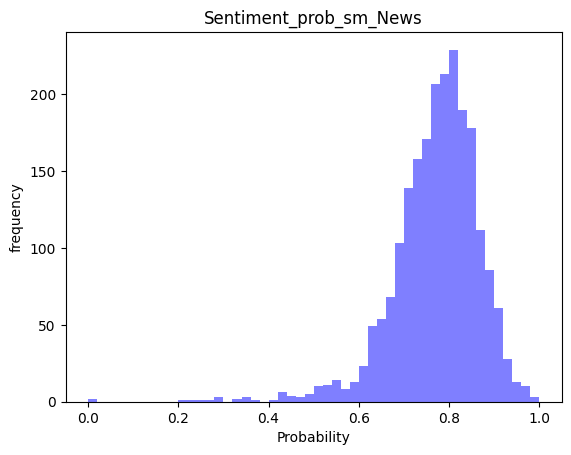

In [60]:
import matplotlib.pyplot as plt
# 히스토그램 생성
plt.hist(sm_news_df['보정된_감정분석확률'], bins=50, alpha=0.5, color='blue')

# 그래프 제목과 축 레이블 설정
plt.title('Sentiment_prob_sm_News')
plt.xlabel('Probability')
plt.ylabel('frequency')

# 그래프 보여주기
plt.show()

In [61]:
sm_news_df['감정레이블'] = sm_news_df['보정된_감정분석확률'].apply(assign_label)
emotion_label_counts = sm_news_df['감정레이블'].value_counts()
print(emotion_label_counts)

약한 긍정    1587
강한 긍정     410
중립        175
약한 부정      11
강한 부정       2
Name: 감정레이블, dtype: int64


In [62]:
# 감정 레이블의 빈도를 비율로 변환
emotion_label_counts = sm_news_df['감정레이블'].value_counts(normalize=True)

# 결과 출력
print(emotion_label_counts)

약한 긍정    0.726316
강한 긍정    0.187643
중립       0.080092
약한 부정    0.005034
강한 부정    0.000915
Name: 감정레이블, dtype: float64
